In [24]:
#Различный код, который потребуется далее.
from IPython.display import Image
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
from IPython.core.display import HTML 

def adj_matrix():
    if(radio.value == '1'):
        return 'Неверно. Попробуйте ещё раз.'
    elif(radio.value == '2'):
        return 'Верно, матрица смежности - 2.'
    elif(radio.value == '3'):
        return 'Неверно. Попробуйте ещё раз.'
    else:
        return 'Пожалуйста, выберите номер матрицы смежности.'


<h1>Лекция №3:<h1>

![title](label1.png)

**План занятия:**
<ol>
<li>Матрица смежности и её свойства</li>
<li>Теорема о числе (i,j)-путей длины k</li>
<li>Характеристический полином графа Г</li>
<li>Характеризация спектральных свойств k-регулярных графов</li>
<li>Спектр графа</li>
<li>Изоспектральные графы</li>
</ol>

![title](label_1.png)

<img align="left" src="defin.png"> &nbsp; Пусть Г = (V,E), |V| = n,
тогда матрица смежности графа $-$ квадратная бинарная матрица порядка n, элементы которой определяются следующим образом:
$A(\Gamma) = (A_{ij})_{n \times n} = 
\begin{cases}
1,\ & i\sim j;\\
0,\ & i \nsim j.
\end{cases}
$

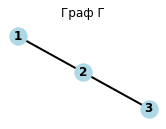

In [27]:
G_test = nx.Graph()
G_test.add_nodes_from([1,2,3])
G_test.add_edges_from([(1,2),(2,3)])
plt.subplot(224)
options = {'node_color': "lightblue",
          'width': 2,}
nx.draw(G_test, **options, with_labels=True, font_weight='bold')
plt.title("Граф Г")
plt.show()

Матрица смежности графа Г выглядит следующим образом:
$
A(Г) =
\begin{pmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix}
$

In [11]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 2), (1, 3), (2,6), (3, 4),(3,5),(2,4),(2,5), (3,6)])

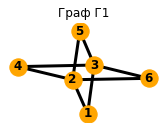

In [28]:
plt.subplot(224)
options = {'node_color': "orange",
          'width': 3,}
nx.draw(G, **options, with_labels=True, font_weight='bold')
plt.title("Граф Г1")
plt.show()

**Рассмотрим граф Г1, приведённый выше. Как выглядит его матрица смежности?**

$$
1 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 0& 1& 1& 1& 0&1\\
\textbf{2} & 1& 0& 1& 1& 1&1\\
\textbf{3} & 0& 0& 0& 0& 0&0\\
\textbf{4} & 1& 1& 0& 1& 1&1\\
\textbf{5} & 0& 1& 0& 1& 1&1\\
\textbf{6} & 0& 1& 1& 0& 0&0\\
\end{pmatrix}
\quad 2 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 0& 1& 1& 0& 0& 0\\
\textbf{2} & 1& 0& 0& 1& 1& 1\\
\textbf{3} & 1& 0& 0& 1& 1& 1\\
\textbf{4} & 0& 1& 1& 0& 0& 0\\
\textbf{5} & 0& 1& 1& 0& 0& 0\\
\textbf{6} & 0& 1& 1& 0& 0& 0\\
\end{pmatrix}
\quad 3 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 1& 0& 0& 1& 1& 1\\
\textbf{2} & 0& 1& 1& 0& 0& 0\\
\textbf{3} & 0& 1& 1& 0& 0& 0\\
\textbf{4} & 1& 0& 0& 1& 1& 1\\
\textbf{5} & 1& 0& 0& 1& 1& 1\\
\textbf{6} & 1& 0& 0& 1& 1& 1\\
\end{pmatrix}
$$

In [15]:
radio = widgets.RadioButtons(
    options=['1', '2', '3'],
    value = None,
    description='A = ',
    disabled=False
)
radio

RadioButtons(description='A = ', options=('1', '2', '3'), value=None)

In [19]:
print(adj_matrix())

Верно, матрица смежности - 2.


**Матрица смежности обыкновенного графа:**

* симметричная
* содержит нулевую диагональ (т.к. нет петель)
* $
\displaystyle\sum_{j=1}^na_{ij} = deg(i), \quad i = \overline{1,n}
$ &nbsp; (сумма элементов любой строки совпадает со степенью соответствующей вершины графа).



<img align="left" src="defin.png"> &nbsp; **Соседством вершины** $i$ в графе $G$ называется множество смежных ей вершин.<br>
<img align="left" src="obozn.png">  <br> &nbsp; $N(i) = {j: dist(i,j) = 1}$, где $dist(i,j)$ - расстояние от вершины $i$ до вершины $j$.

<img align="left" src="zam.png"> &nbsp; $|N(i)| = deg(i)$
(Мощность соседства равна степени вершины $i$).

<img align="left" src="defin.png"> &nbsp; **Следом** матрицы $A$ называется сумма диагональных элементов матрицы $A$.<br> <br> <br> 


<img align="left" src="obozn.png"> &nbsp; $Tr(A) = \displaystyle\sum_{i=1}^na_{ii}$

**Маршрут в графе** <br>Если мы зафиксировали две вершины в обыкновенном связном графе, между этими двумя вершинами всегда можно проложить какой-то маршрут от вершины к вершине по ребрам. Ребра и вершины могут повторяться.

<img align="left" src="defin.png"> &nbsp; **Путь** $-$ маршрут, в котором рёбра не повторяются. <br><br>

<img align="left" src="defin.png"> &nbsp; **Простой путь** $-$ маршрут, в котором ни рёбра, ни вершины не повторяются.<br><br>

<img align="left" src="defin.png"> &nbsp; **Кратчайший путь** $-$ кратчайшее расстояние между вершинами.

![title](punkt_2.png)

Степени матрицы смежности задают **число путей** фиксированной длины между двумя заданными вершинами.<br>
<img align="left" src="theorem.png"> <br><br><br>
Пусть $\Gamma = (V,E)$ имеет матрицу смежности $A = A(G)$ и пусть $B = A^k$, где $k$ - некоторое целое число. <br> Тогда $b_{ij}$ равен числу $(i,j)$-путей длины k в графе $\Gamma$.<br>
<img align="left" src="proof.png"><br><br><br>
Воспользуемся индукцией по $k$.
Пусть $k = 1, B = A^1 = A$, тогда теорема выполняется.

Предположим, что условие теоремы выполняется для $k-1$, т.е. для $C = A^{k-1}$.<br>
(Каждый элемент матрицы $C$ соответствует числу путей между вершинами $i$ и $j$ длины $k-1$).<br>
Докажем индукционный переход от $k-1$ к $k$.<br>
Рассмотрим элемент $b_{ij}$.<br>
$B = C \cdot A$<br>
$b_{ij} = \displaystyle\sum_{s=1}^nc_{is}\cdot a_{sj}$, где $c_{is} > 0$ и $a_{sj} > 0$.<br>
По индукционному предположению:
* $c_{is}$ $-$ это число $(i,s)$-путей длины $k-1$;
* $a_{sj}$ соответствует дополнительному ребру $\{s,j\}$.<br>
<img align="left" src="ijpaths.png">

<img align="left" src="defin.png"> &nbsp; **След** матрицы $A$ порядка $n$ $-$ это сумма её диагональных элементов.<br>
<img align="left" src="obozn.png"> &nbsp; $Tr(A) = \displaystyle\sum_{i=1}^na_{ii}$<br>
<img align="left" src="sled.png"> <br>&nbsp; Число замкнутых путей длины $k$ в графе $\Gamma$ равно $Tr(A^k)$.<br>
<img align="left" src="sled.png"> <br>&nbsp; Для матрицы смежности $A$ любого обыкновенного графа $\Gamma = (V,E)$ справедливо:<br>
* $Tr(A^0) = Tr(I) = n$
* $Tr(A) = 0$
* $Tr(A^2) = 2 \cdot m$, где $m = |E(\Gamma)|$
* $Tr(A^3) = 6 \cdot t,$ где $t$ $-$ число циклов $C_3$ в графе $\Gamma$
Первый пункт очевиден, при возведении матрицы смежности в нулевую степень получаем единичную матрицу.<br>
Второй пункт очевиден, в обыкновенном графе нет петель и кратных рёбер, следовательно все элементы на диагонали $-$ нули.<br>
Третий пункт следует из того, что замкнутый путь длины 2 представляет собой проход по ребру и обратно в исходную вершину.<br>
Четвертый пункт доказывается аналогично.


![title](punkt_3.png)

![title](punkt_4_1.png)
![title](punkt_4_2.png)


![title](punkt_5.png)

![title](punkt_6.png)